In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filepath = r'C:\Users\ZhuShouye\retail_store_sales\retail_store_sales.xlsx'
df = pd.read_excel(filepath)

print("Raw data preview:")
display(df.head())
print("\nData info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

Raw data preview:


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,1.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,1.0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0.0
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,0.0



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11966 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 1.1+ MB
None

Missing values per column:
Transaction ID         0
Customer ID            0
Category               

In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert date column
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce').dt.date

# Handle missing values
for col in ['Price Per Unit', 'Quantity', 'Total Spent', 'Discount Applied']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Derived fill
mask = df['Price Per Unit'].isna() & df['Quantity'].notna() & df['Total Spent'].notna()
df.loc[mask, 'Price Per Unit'] = df.loc[mask, 'Total Spent'] / df.loc[mask, 'Quantity']
# Filling missing values
df.fillna({'Item': 'Unknown', 'Discount Applied': 'Not Applicable', 'Price Per Unit': 0, 'Quantity': 0, 'Total Spent': 0}, inplace=True)

print("\n--- Data Cleaning Complete ---")
df.info()
print("Cleaned data preview:")
display(df.head())
print("Data shape after cleaning:", df.shape)


--- Data Cleaning Complete ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              12575 non-null  object 
 4   Price Per Unit    12575 non-null  float64
 5   Quantity          12575 non-null  float64
 6   Total Spent       12575 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  12575 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB
Cleaned data preview:


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,1.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,1.0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0.0
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,Not Applicable
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,0.0


Data shape after cleaning: (12575, 11)


In [6]:
# Top selling items summary
top_items = df.groupby('Item')['Quantity'].sum().nlargest(6).iloc[1:6].reset_index()
top_items.columns = ['Item', 'Total Quantity Sold']
print("\n--- Top 5 Selling Items ---")
print(top_items)

# Total sales by category summary
sales_by_category = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False).reset_index()
print("\n--- Sales by Category ---")
print(sales_by_category)


--- Top 5 Selling Items ---
           Item  Total Quantity Sold
0    Item_2_BEV                676.0
1  Item_16_MILK                627.0
2   Item_25_FUR                616.0
3  Item_19_MILK                589.0
4  Item_13_FOOD                581.0

--- Sales by Category ---
                             Category  Total Spent
0                            Butchers     208118.0
1       Electric household essentials     203813.5
2                           Beverages     197047.5
3                           Furniture     195310.0
4                                Food     194812.0
5  Computers and electric accessories     190692.5
6                          Patisserie     182165.5
7                       Milk Products     180112.0


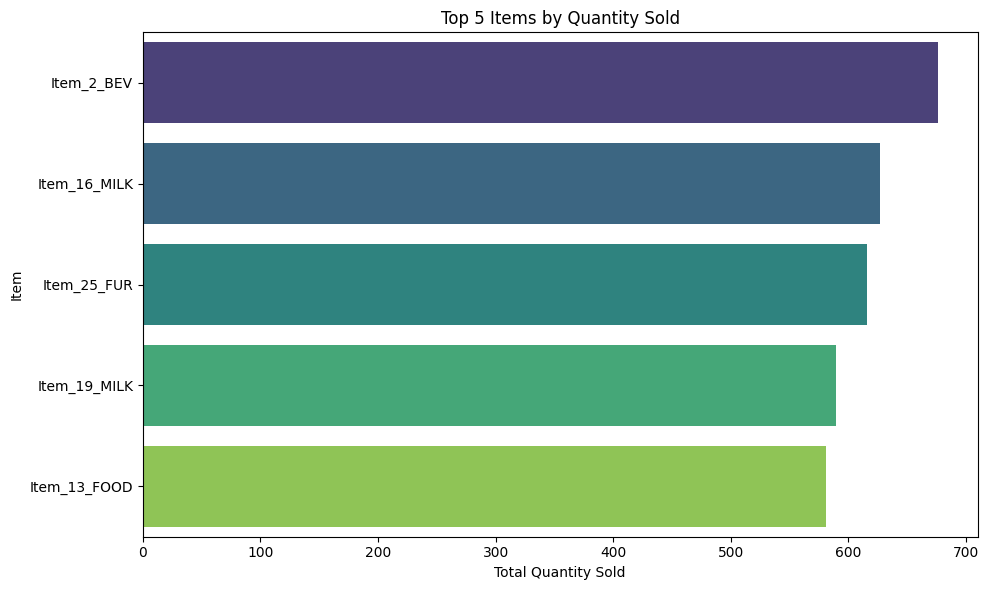

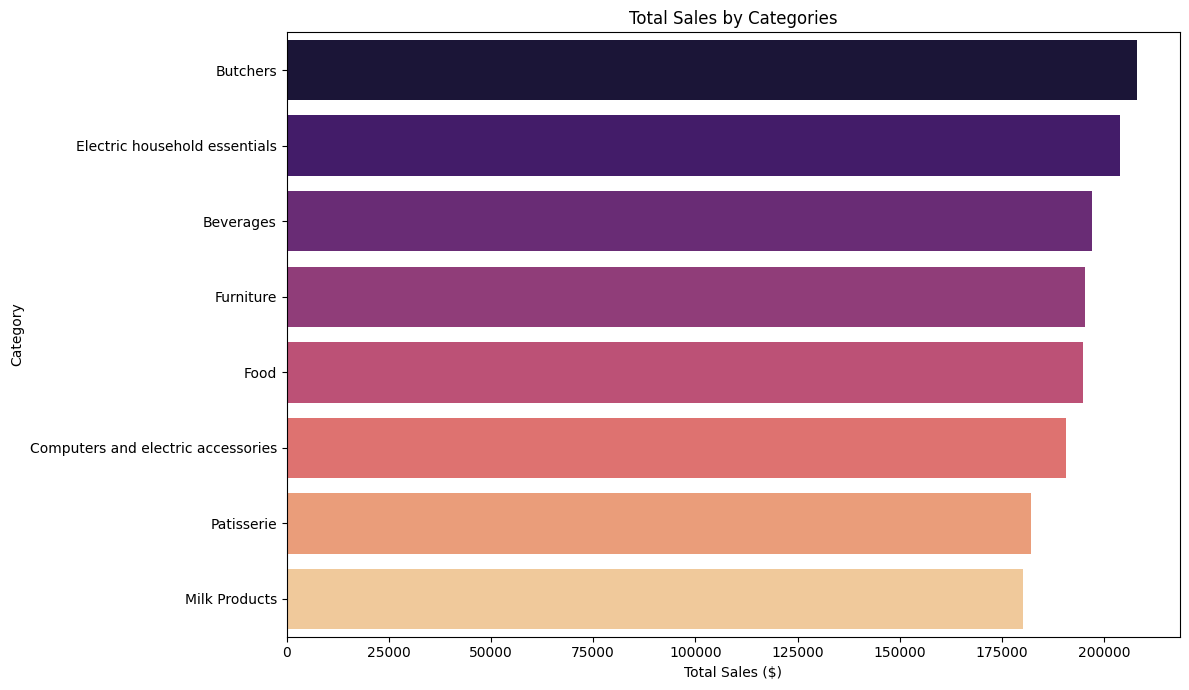

In [7]:
# Top 5 selling items (Bar Chart) 
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Quantity Sold', y='Item', data=top_items, hue='Item', palette='viridis', legend=False)
plt.title('Top 5 Items by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item')
plt.tight_layout()
plt.savefig('top_items.png')
plt.show()

# Sales breakdown by category (Bar Chart)
plt.figure(figsize=(12, 7))
sns.barplot(x='Total Spent', y='Category', data=sales_by_category, hue='Category', palette='magma', legend=False)
plt.title('Total Sales by Categories')
plt.xlabel('Total Sales ($)')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('sales_by_category.png')
plt.show()

In [8]:
# Save cleaned data and summaries back to the Excel file
with pd.ExcelWriter(filepath, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    df.to_excel(writer, sheet_name='Clean Data', index=False)
    top_items.to_excel(writer, sheet_name='Analysis & Summary', startrow=0, startcol=0, index=False)
    sales_by_category.to_excel(writer, sheet_name='Analysis & Summary', startrow=7, startcol=0, index=False)

print("\n*** Successfully saved cleaned data and summaries back to the Excel file. ***")


*** Successfully saved cleaned data and summaries back to the Excel file. ***
